,Cross-Validation Mean Accuracy,Test Accuracy,Classification Report
kNN,0.794446,0.803783,"{'0': {'precision': 0.6933333333333334, 'recal..."
Decision Tree,0.930701,0.905437,"{'0': {'precision': 0.9591836734693877, 'recal..."
Logistic Regression,0.875002,0.869976,"{'0': {'precision': 0.8983050847457628, 'recal..."
Naive Bayes,0.560464,0.598109,"{'0': {'precision': 0.6923076923076923, 'recal..."
Neural Network,0.920612,0.926714,"{'0': {'precision': 0.9622641509433962, 'recal..."


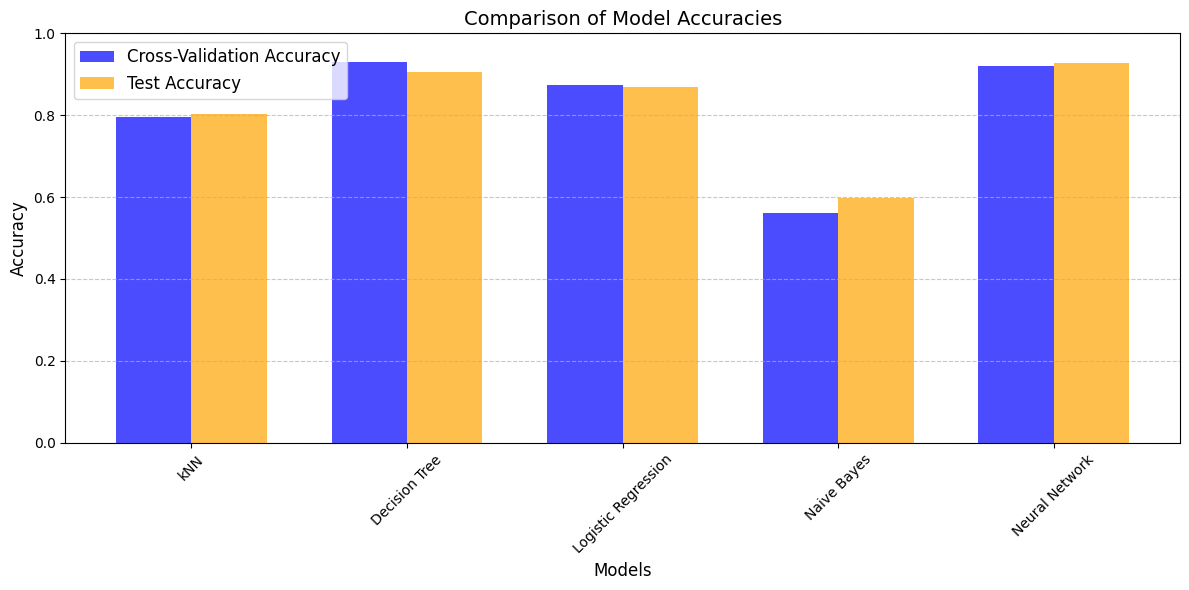

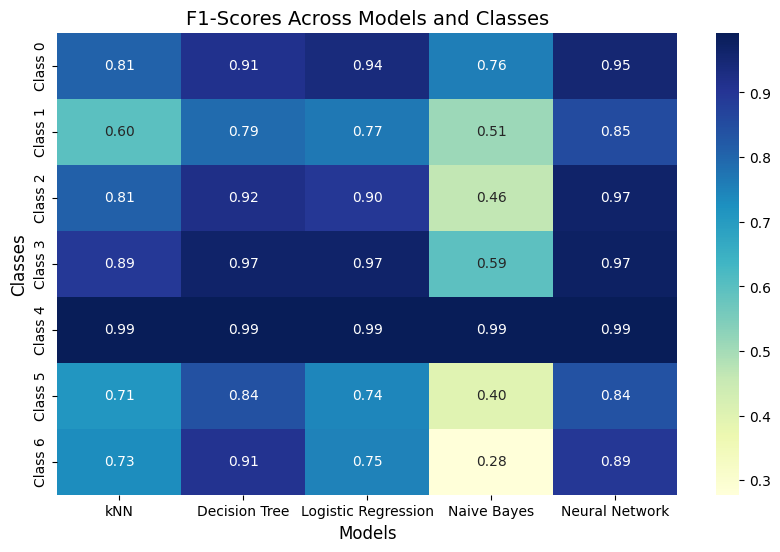

The best-performing model is Neural Network with a Test Accuracy of 0.93.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from IPython.display import display
import numpy as np

#Load the dataset
dataset = pd.read_csv('obesity_dataset.csv')

#Preprocessing the data
label_enc = LabelEncoder()
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
                    'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
for col in categorical_cols:
    dataset[col] = label_enc.fit_transform(dataset[col])

# Separate features (X) and target variable (y)
X = dataset.drop('NObeyesdad', axis=1)
y = dataset['NObeyesdad']  # Target variable (Obesity Level)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Train and validate each model
results = {}
for model_name, model in models.items():
    # Cross-validation: Reliable evaluation by splitting data into 5 folds
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    test_accuracy = accuracy_score(y_test, y_pred)  # Evaluate test accuracy
    results[model_name] = {
        'Cross-Validation Mean Accuracy': cv_scores.mean(),
        'Test Accuracy': test_accuracy,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

# Step 5: Display results in a DataFrame for clarity
results_df = pd.DataFrame(results).T
display(results_df)

# Visualizing with Bar Chart and Heatmap

# Bar chart: Compare Cross-Validation and Test Accuracy
bar_width = 0.35
r1 = np.arange(len(results_df.index))  # Positions for Cross-Validation bars
r2 = [x + bar_width for x in r1]  # Positions for Test Accuracy bars

# Extract metrics for visualization
model_names = results_df.index
cv_accuracies = results_df['Cross-Validation Mean Accuracy']
test_accuracies = results_df['Test Accuracy']

plt.figure(figsize=(12, 6))
plt.bar(r1, cv_accuracies, color='blue', width=bar_width, label='Cross-Validation Accuracy', alpha=0.7)
plt.bar(r2, test_accuracies, color='orange', width=bar_width, label='Test Accuracy', alpha=0.7)
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks([r + bar_width / 2 for r in r1], model_names, rotation=45, fontsize=10)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Heatmap: Visualizing Precision, Recall, and F1-Scores
# Extract F1-scores for all models and classes
f1_scores = {
    model: [report[str(cls)]['f1-score'] for cls in range(len(report)-3)]
    for model, report in zip(model_names, results_df['Classification Report'])
}

# Convert F1-scores to a DataFrame
f1_df = pd.DataFrame(f1_scores, index=[f'Class {i}' for i in range(len(f1_scores[model_names[0]]))])

plt.figure(figsize=(10, 6))
sns.heatmap(f1_df, annot=True, cmap='YlGnBu', cbar=True, fmt=".2f")
plt.title('F1-Scores Across Models and Classes', fontsize=14)
plt.ylabel('Classes', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.show()

# Step 7: Highlighting the best-performing model
best_model = results_df['Test Accuracy'].idxmax()
print(f"The best-performing model is {best_model} with a Test Accuracy of {results_df['Test Accuracy'].max():.2f}.")
